<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series EDA

_Author: Unknown_

----
This lab will walk you through performing exploratory data analysis on a dataset of weekly chickenpox cases from Hungary. This dataset is from the UCI Machine Learning Repository. You can read more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/Hungarian+Chickenpox+Cases).

-----

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Only using one county
pox = pd.read_csv('data/hungary_chickenpox.csv')[['Date', 'BUDAPEST']]

# Renaming columns for readability
pox.columns = ['date', 'budapest_cases']
pox.head(3)

,date,budapest_cases
0,03/01/2005,168
1,10/01/2005,157
2,17/01/2005,96


**Check the dataframe dtypes**

In [3]:
pox.dtypes

date              object
budapest_cases     int64
dtype: object

**Check for nulls**

In [4]:
pox.isnull().sum()

date              0
budapest_cases    0
dtype: int64

**Casting the `'Date'` column to a datetime type**

Use `pd.to_datetime` to convert the `Date` column to a datetime.

**WARNING**: The date column is formated as day-month-year. Does `pd.to_datetime` work the way you expect it to on day/month/year strings? If it doesn't work the way you expect it to, check [the documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) for `pd.to_datetime`, and see if one of the settings fixes things.

In [5]:
pox["date"] = pd.to_datetime(pox["date"], dayfirst=True)
# dayfirst=True Ignore Warning provide format or specify infer_datetime_format=true for consistent parsing

In [6]:
# Recheck 
pox.dtypes

date              datetime64[ns]
budapest_cases             int64
dtype: object

**Set the `'Date'` column to be the index**

In [7]:
pox.set_index("date", inplace=True)

---

Now that our data is formatted appropriately, we can embark on EDA.

### Summary statistics

**What times does the dataset describe?**

That is, what's the earliest date in the dataset, and what's the latest date?

In [8]:
pox.head()
# The earliest date is 2005-01-03 in the dataset

,budapest_cases
date,
2005-01-03,168
2005-01-10,157
2005-01-17,96
2005-01-24,163
2005-01-31,122


In [9]:
pox.tail()
# The lastest date is 2014-12-29 in the dataset

,budapest_cases
date,
2014-12-01,95
2014-12-08,43
2014-12-15,35
2014-12-22,30
2014-12-29,259


**Plot a histogram of the Budapest cases column**

Skew of Budapest cases : 0.9516605073017268
SD of Budapest cases : 76.35487172245179


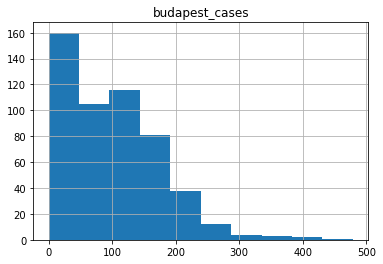

In [10]:
pox.hist();
print(f"Skew of Budapest cases : {pox['budapest_cases'].skew()}")
print(f"SD of Budapest cases : {pox['budapest_cases'].std()}")

**How many cases were there per year?**

Recall that with time series data, we can't simply group by on the year. You'll need to use the `resample` method on the DataFrame to answer this question.

In [11]:
pox.resample("Y").sum()

,budapest_cases
date,
2005-12-31,4562
2006-12-31,6498
2007-12-31,6311
2008-12-31,4441
2009-12-31,5527
2010-12-31,5222
2011-12-31,5404
2012-12-31,5353
2013-12-31,5157


### Visualizations

**Make a line plot of chickenpox cases**

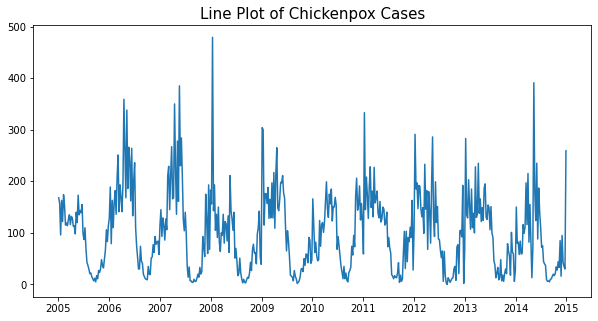

In [12]:
plt.figure(figsize=(10,5))
plt.plot(pox["budapest_cases"])
plt.title("Line Plot of Chickenpox Cases", size=15);

**In short answer format, describe any apparent trends**

In [13]:
# Chickenpox cases is not a trend in the plot. 
# There is increasing and decreasing all the time.
# But there is appear to be seasonality 
# It appear to fluctuate with a fixed and know frequency. (4-week)

### Plot rolling averages

Plot the weekly chickenpox cases, but on the same graph, also plot the 4-week and 12-week rolling averages.

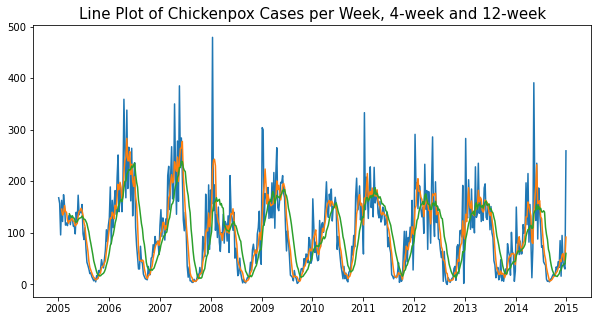

In [14]:
plt.figure(figsize=(10,5))
plt.plot(pox["budapest_cases"])
plt.plot(pox["budapest_cases"].rolling(4).mean())
plt.plot(pox["budapest_cases"].rolling(12).mean())
plt.title("Line Plot of Chickenpox Cases per Week, 4-week and 12-week", size=15);

### Plot yearly chickenpox cases

You may need to use `resample` again for this.

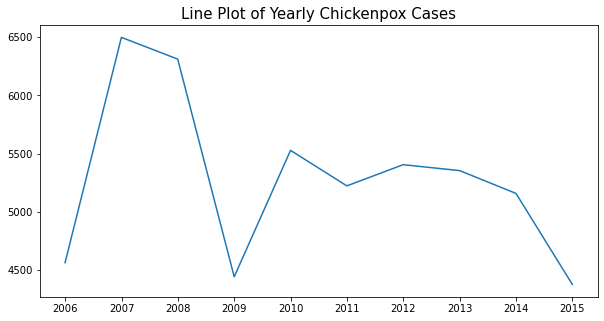

In [15]:
plt.figure(figsize=(10,5))
plt.plot(pox.resample("Y").sum())
plt.title("Line Plot of Yearly Chickenpox Cases", size=15);